# Imports

In [55]:
from barycentricLagrangeInterpolation import InterpolatingFunction

import numpy as np
import matplotlib.pyplot as plt

If the barycentricInterpolation module can not be found ("ModuleNotFoundError: No module named 'barycentricInterpolation'"), your installation of the this module failed. Probably you just forgot to run (sudo -H) python3 setup.py install within the basedirectory of this project.
For further information look into the readme on Github.

# Preparation

If you need further information on the mathematical background and literature on the following, look into the readme on Github.
Please don't be scared by the warnings due to dividing by zero or multiplying with nan. All cases are handled properly.

Before we can interpolate a function, we have to do some preperations.

Firstly we define the number of nodes (nNodes).

In [56]:
nNodes = 14

Now we create an object of the InterpolatingFunction class.

In [57]:
f = InterpolatingFunction()

initializing interpolating function class


Here we calculate the position of the nodes, namely Chebyshev points of the second kind (aka Gauss-Lobatto grid points). This choice is essential to obtain later a smooth as possible function an to avoid effects like Runge's phenomenon. All nodes are on the intervall [-1,1].

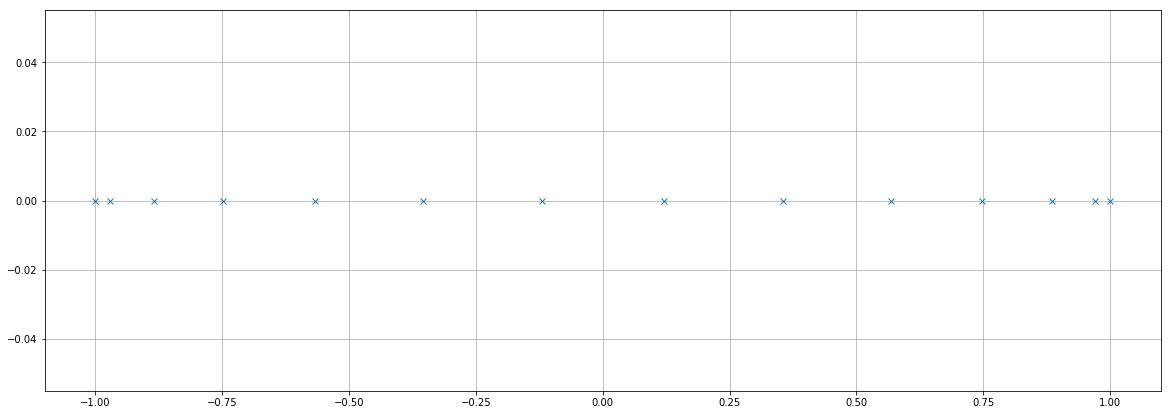

In [58]:
nodes = f.calculateNodes(nNodes,plot=True)

Next we calculate the barycentric weight of every node. These weights enable us later to interpolate and differentiate functions extremly simple, enormously performant and nummerically highly stable.

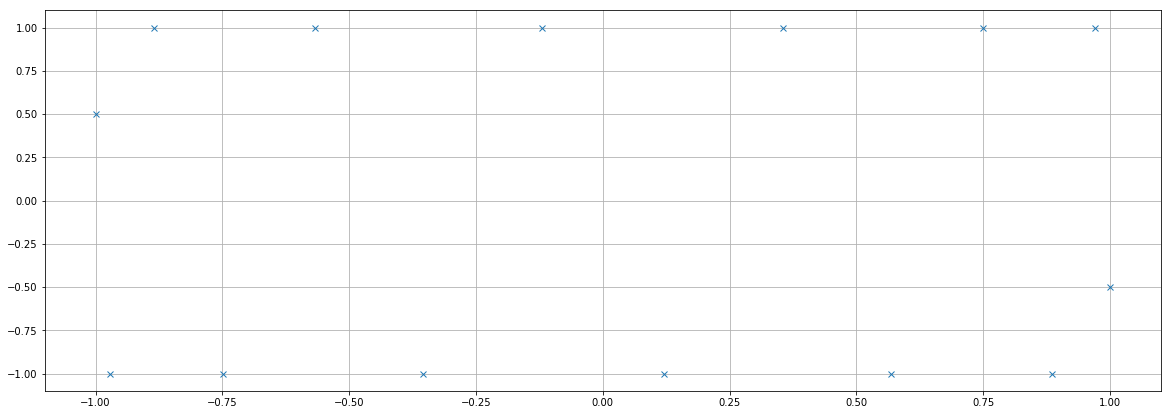

In [59]:
weights = f.calculateWeights(nodes,plot=True)

Now we are able to generate the base functions of the interpolation. For every node exists one base function. These base functions are independent of the values of the function to interpolate. This is probably the most important advantage of barycentric interpolation.

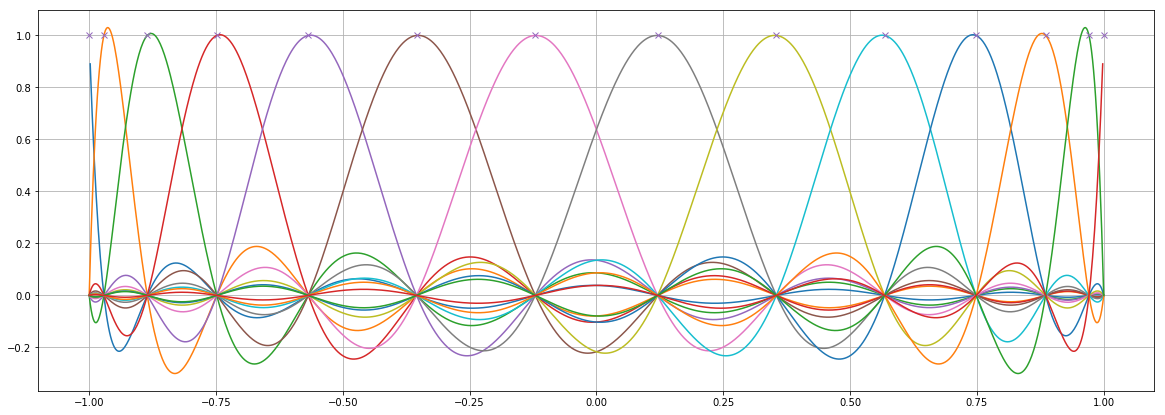

In [60]:
l= f.calculateBasisFunctions(nodes,weights,1000,plot=True)

# Interpolate Testfunction

Now we are ready, to interpolate an test function. Firstly we have to calculate the values of a testfunction at the sampling points. Here f(x)=x^3 is chosen.

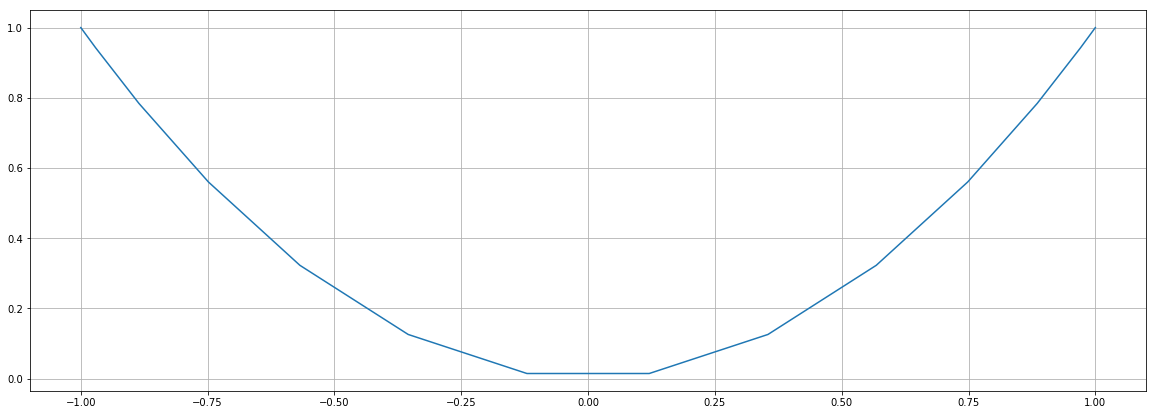

In [61]:
values=np.power(nodes,2)
#values=np.cbrt(nodes)
plt.plot(nodes,values)
plt.grid(True)
plt.show()

Now we generate the interpolating function.

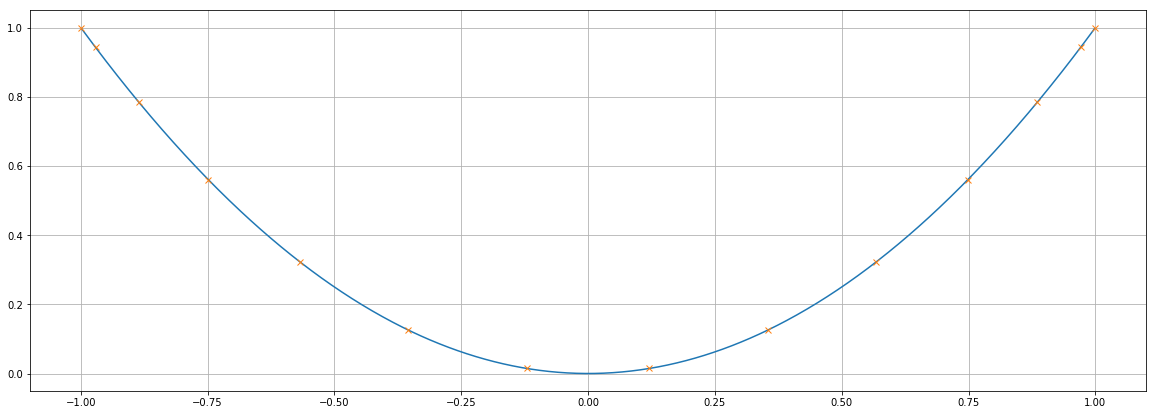

In [62]:
p=f.interpolateFunction(values,l,plot=True,nodes=nodes)

# Differentiate Testfunction

Before we can differentiate the testfunction, we have to create a differentiation matrix. Here the matrix for the first derivative is calculated, but you can simply change it to a higher derivative by adapting the parameter accordingly.

In [63]:
D = f.differentiationMatrix(1,nodes,weights)

Now we can calulate the values of the derivative at the sampling points.

In [64]:
der_nodes = f.derivative(values,D)

Finally, we generate an interpolating function for the derivative.

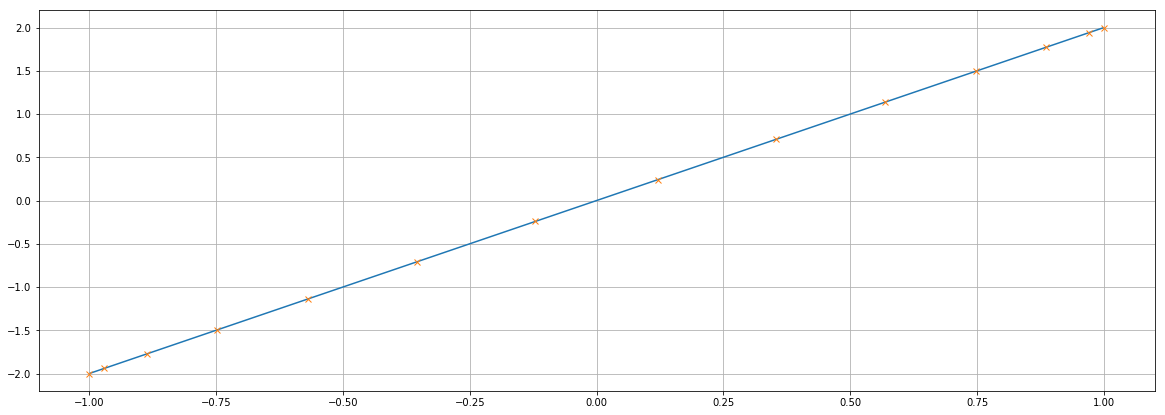

In [65]:
der=f.interpolateFunction(der_nodes,l,plot=True,nodes=nodes)